### Project (Income Classifier System)

### Problem Statement
<ul>
    <li>Subsidy Inc. delivers subsidies to individuals based on
        their income.</li>
    <li>Accurate income data is one of the hardest piece of data
        to obtain across the world.</li>
    <li>Subsidy Inc. has obtained a large data set of
authenticated data on individual income, demographic
        parameters, and a few financial parameters.</li>
    <li>Subsidy Inc. wishes us to:
Develop an income classifier system for individuals.</li>
    
</ul>

### The Objective is to:
<h6>Simplify the data system by reducing the number of variables to be studied, without sacrificing too much. Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse.</h6>

In [1]:
import pandas as pd  # To work with dataframes
import numpy as np # To perform numerical operations
import seaborn as sns # To visualize data
import matplotlib.pyplot as plt # To visualize data
from sklearn.model_selection import train_test_split # To partition the data
from sklearn.linear_model import LogisticRegression # importing the library of LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  # importing the library of KNN
from sklearn.metrics import accuracy_score,confusion_matrix # Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
# The libraries & modules which we are going to use in our study:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\jupyter Notebook\income(1).csv",na_values=["?"])

In [3]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
df.shape

(31978, 13)

In [6]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
# for categorical variables

df.describe(include ="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [8]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [9]:
df['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [10]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
missing_rows = df[df.isnull().any(axis=1)]
df1=df.dropna()
df1.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [12]:
df1.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [13]:
# Realtionship between independent variables

correlation =  df.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077490,0.057282,0.068299
capitalgain,0.077490,1.000000,-0.031499,0.079112
capitalloss,0.057282,-0.031499,1.000000,0.053106
hoursperweek,0.068299,0.079112,0.053106,1.000000


In [14]:
df['gender'].value_counts()

 Male      21370
 Female    10608
Name: gender, dtype: int64

In [15]:
df['SalStat'].value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

In [16]:
df['SalStat'].groupby(df['gender']).value_counts()

gender   SalStat                      
 Female   less than or equal to 50,000     9446
          greater than 50,000              1162
 Male     less than or equal to 50,000    14837
          greater than 50,000              6533
Name: SalStat, dtype: int64

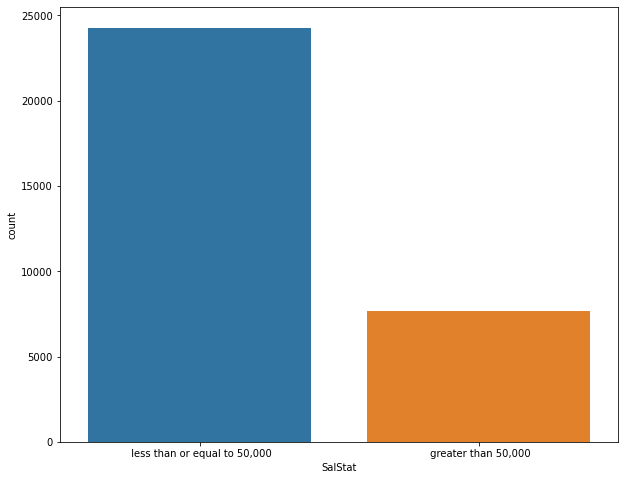

In [17]:
ax, fig = plt.subplots(figsize=[10,8])
sns.countplot(df['SalStat'])

- 75 % of people's salary status is <=50,000 
- 25% of people's salary status is > 50,000

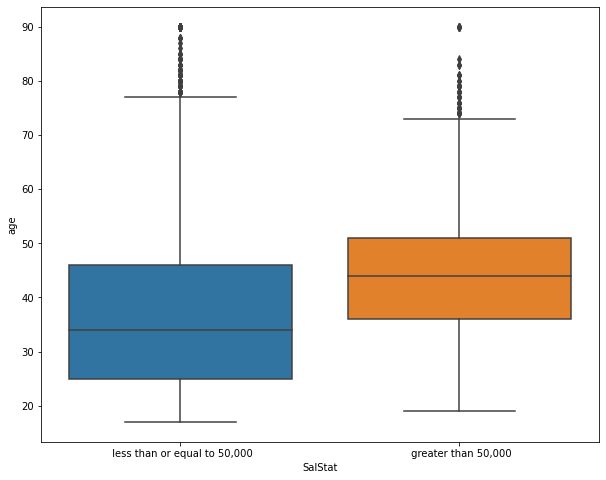

In [18]:
ax, fig = plt.subplots(figsize=[10,8])
sns.boxplot('SalStat','age',data = df)

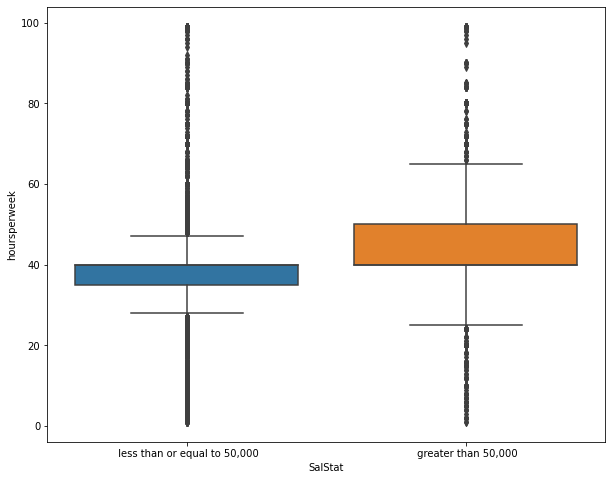

In [19]:
ax, fig = plt.subplots(figsize=[10,8])
sns.boxplot('SalStat','hoursperweek',data = df)

- From the plot it is clearly visible that those who make more than 50000 USD per year are more likely to spend 40-50 hours per week.
- This varibale can contribute in classifying the individual's salary staus since there is association between salary status and hours per week.

In [20]:
df['SalStat'].groupby(df['JobType']).value_counts()

JobType            SalStat                      
 Federal-gov        less than or equal to 50,000      578
                    greater than 50,000               365
 Local-gov          less than or equal to 50,000     1458
                    greater than 50,000               609
 Never-worked       less than or equal to 50,000        7
 Private            less than or equal to 50,000    17410
                    greater than 50,000              4876
 Self-emp-inc       greater than 50,000               600
                    less than or equal to 50,000      474
 Self-emp-not-inc   less than or equal to 50,000     1785
                    greater than 50,000               714
 State-gov          less than or equal to 50,000      935
                    greater than 50,000               344
 Without-pay        less than or equal to 50,000       14
Name: SalStat, dtype: int64

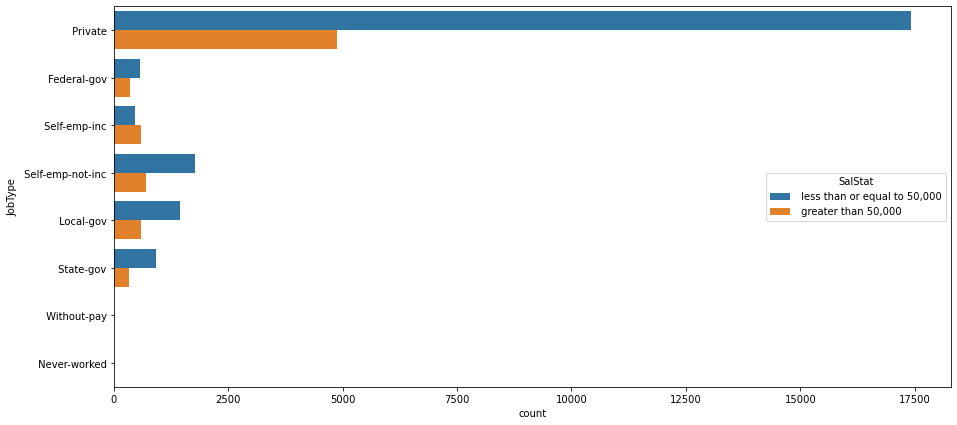

In [21]:
ax, fig = plt.subplots(figsize=[15,7])
JobType   = sns.countplot(y=df['JobType'],hue = 'SalStat', data=df)


-  FRom the above table it is visible that 56% of self employed people earn more than 50000 USD per year.
- Hence an importance variable in avoiding the misuse of Subsides.

In [22]:
df['SalStat'].groupby(df['EdType']).value_counts()

EdType         SalStat                      
 10th           less than or equal to 50,000     860
                greater than 50,000               61
 11th           less than or equal to 50,000    1108
                greater than 50,000               59
 12th           less than or equal to 50,000     386
                greater than 50,000               31
 1st-4th        less than or equal to 50,000     157
                greater than 50,000                6
 5th-6th        less than or equal to 50,000     304
                greater than 50,000               14
 7th-8th        less than or equal to 50,000     590
                greater than 50,000               37
 9th            less than or equal to 50,000     480
                greater than 50,000               26
 Assoc-acdm     less than or equal to 50,000     793
                greater than 50,000              262
 Assoc-voc      less than or equal to 50,000    1009
                greater than 50,000              357
 

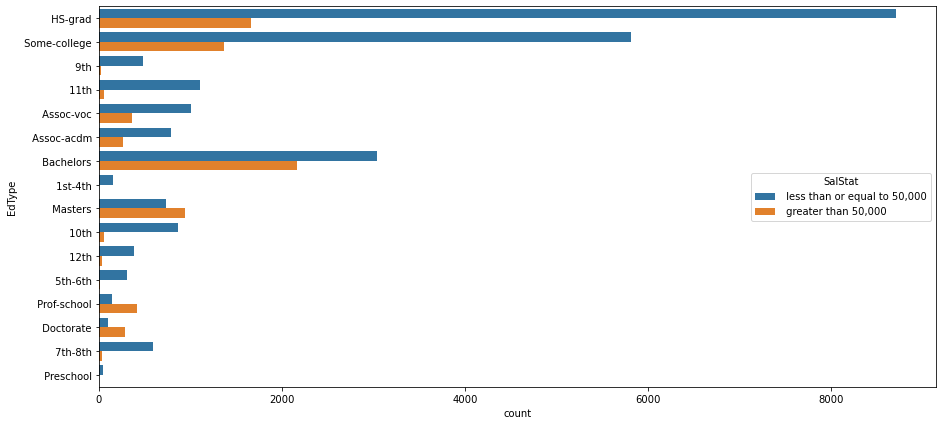

In [23]:
ax, fig = plt.subplots(figsize=[15,7])
Education   = sns.countplot(y=df['EdType'],hue = 'SalStat', data=df)

From the above table we can see that people who have done Doctorate, Masters, Prof-school are more likely to earn above 50000 USD per year when compared with others. Hence an influencing variable in avoiding the misuse of subsidies.

In [24]:
# Occupation
df['SalStat'].groupby(df['occupation']).value_counts()

occupation          SalStat                      
 Adm-clerical        less than or equal to 50,000    3223
                     greater than 50,000              498
 Armed-Forces        less than or equal to 50,000       8
                     greater than 50,000                1
 Craft-repair        less than or equal to 50,000    3122
                     greater than 50,000              908
 Exec-managerial     less than or equal to 50,000    2055
                     greater than 50,000             1937
 Farming-fishing     less than or equal to 50,000     874
                     greater than 50,000              115
 Handlers-cleaners   less than or equal to 50,000    1267
                     greater than 50,000               83
 Machine-op-inspct   less than or equal to 50,000    1721
                     greater than 50,000              245
 Other-service       less than or equal to 50,000    3080
                     greater than 50,000              132
 Priv-house-serv     l

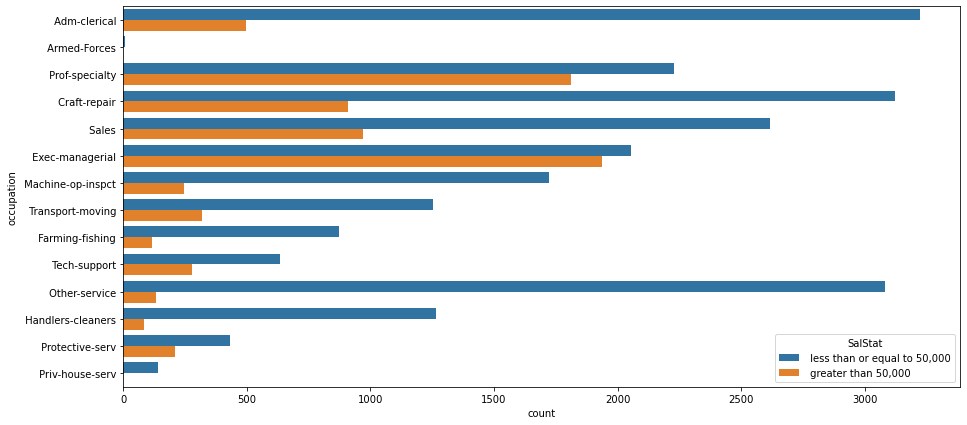

In [25]:
ax, fig = plt.subplots(figsize=[15,7])
Occupation  = sns.countplot(y=df['occupation'],hue = 'SalStat', data=df)

In [26]:
# meadian age in respective salary 
df.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             44
 less than or equal to 50,000    34
Name: age, dtype: int64

# Data pre-processing for Machine Learning Model

In [27]:
# Reindexing the salary status names to 0,1
df['SalStat']=df['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

print(df['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [28]:
df= pd.get_dummies(df, drop_first=True)

# Storing the column names 
columns_list=list(df.columns)

# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))

In [29]:
# Storing the output values in y
y=df['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [30]:
# Storing the values from input features
x = df[features].values
print(x)

[[ 1 28  0 ...  0  1  0]
 [ 1 40  0 ...  0  1  1]
 [ 1 40  0 ...  0  1  0]
 ...
 [ 1 40  0 ...  0  1  0]
 [ 1 40  0 ...  0  1  0]
 [ 1 40  0 ...  0  1  0]]


In [31]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

# Machine Learning Models 
##  LogisticRegression

In [32]:
logistic_model = LogisticRegression()

# Fitting the values for x and y
logistic_model.fit(train_x,train_y)


# Prediction from test data
prediction_log = logistic_model.predict(test_x)
print(prediction_log)

[0 0 0 ... 0 0 0]


C:\Users\20jai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Calculating the accuracy
accuracy_score_log =accuracy_score(test_y, prediction_log)
print(accuracy_score_log * 100)

84.91765686887638


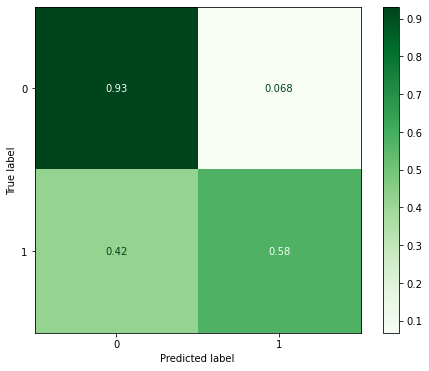

In [34]:
cm = confusion_matrix(test_y, prediction_log.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

### **KNN**

In [40]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 16)

# Fitting the values for X and Y
KNN_classifier.fit(train_x, train_y) 

# Predicting the test values with model
prediction_knn= KNN_classifier.predict(test_x)

In [41]:
# Calculating the accuracy
accuracy_score_knn = accuracy_score(test_y, prediction_knn)
print(accuracy_score_knn * 100)

85.14696685428392


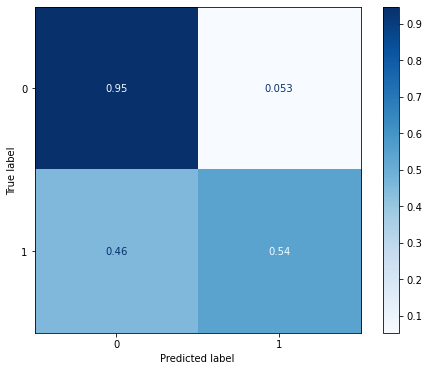

In [43]:
cm = confusion_matrix(test_y, prediction_knn.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

***DECISION TREE***



In [44]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(train_x,train_y)

In [46]:
y_pred_dt = dt.predict(test_x)

In [47]:
dt_model

DecisionTreeClassifier(random_state=101)

Decision Tree Accuracy Score:  0.8154054617469252
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7336
           1       0.61      0.60      0.61      2258

    accuracy                           0.82      9594
   macro avg       0.74      0.74      0.74      9594
weighted avg       0.81      0.82      0.82      9594



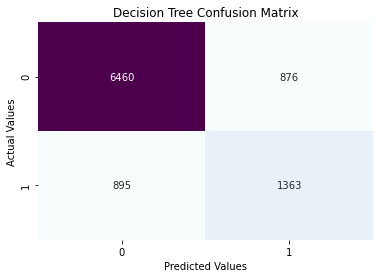

In [48]:
print('Decision Tree Accuracy Score: ',accuracy_score(test_y,y_pred_dt))
cm_rfc=my_confusion_matrix(test_y, y_pred_dt, 'Decision Tree Confusion Matrix')

In [49]:
print(metrics.classification_report(test_y, y_pred_dt)) 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7336
           1       0.61      0.60      0.61      2258

    accuracy                           0.82      9594
   macro avg       0.74      0.74      0.74      9594
weighted avg       0.81      0.82      0.82      9594



In [50]:
acc_dt = metrics.accuracy_score(test_y, y_pred_dt)
acc_dt

0.8154054617469252

***RANDOM FOREST***

In [51]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(train_x,train_y)

In [52]:
y_pred_rf = rf.predict(test_x) 

In [53]:
print(metrics.confusion_matrix(test_y, y_pred_rf)) 

[[6741  595]
 [ 872 1386]]


In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [55]:
rfc.fit(train_x,train_y)
y_pred_rfc=rfc.predict(test_x)

Random Forest Classifier Accuracy Score:  0.8595997498436523
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      7336
           1       0.83      0.51      0.63      2258

    accuracy                           0.86      9594
   macro avg       0.85      0.74      0.77      9594
weighted avg       0.86      0.86      0.85      9594



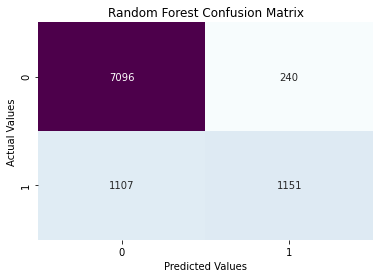

In [56]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(test_y,y_pred_rfc))
cm_rfc=my_confusion_matrix(test_y, y_pred_rfc, 'Random Forest Confusion Matrix')

**SVM Suppoort Vector Machine** 

In [57]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

In [58]:
svm_clf.fit(train_x,train_y)
y_pred_svm=svm_clf.predict(test_x)

SVM Classifier Accuracy Score:  0.8062330623306233
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7336
           1       0.73      0.28      0.40      2258

    accuracy                           0.81      9594
   macro avg       0.77      0.62      0.64      9594
weighted avg       0.79      0.81      0.77      9594



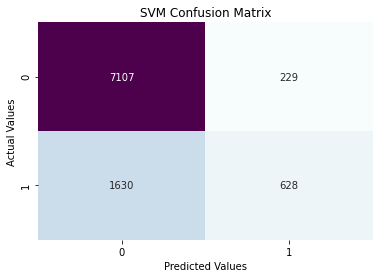

In [59]:
print('SVM Classifier Accuracy Score: ',accuracy_score(test_y,y_pred_svm))
cm_rfc=my_confusion_matrix(test_y, y_pred_svm, 'SVM Confusion Matrix')

**Naive Bayes**

In [60]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(train_x)  
x_test = sc.transform(test_x)  

In [61]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(train_x,train_y) 

GaussianNB()

In [62]:
y_pred_nv = classifier.predict(test_x)  

In [63]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(test_y, y_pred_nv)  

Naive Bayes Accuracy Score:  0.8274963518865958
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7336
           1       0.61      0.74      0.67      2258

    accuracy                           0.83      9594
   macro avg       0.76      0.80      0.78      9594
weighted avg       0.84      0.83      0.83      9594



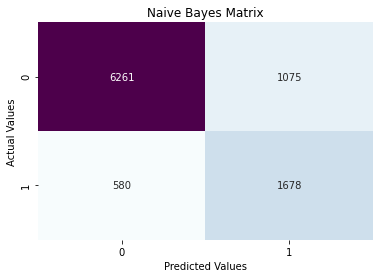

In [64]:
print('Naive Bayes Accuracy Score: ',accuracy_score(test_y,y_pred_nv))
cm_rfc=my_confusion_matrix(test_y, y_pred_nv, 'Naive Bayes Matrix')

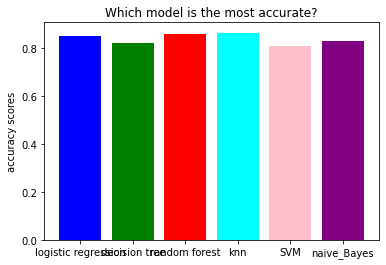

In [68]:
models = ['logistic regression', 'decision tree', 'random forest', 'knn','SVM','naive_Bayes']
acc_scores = [0.85,0.82,0.86,0.8629,0.81,0.83]

plt.bar(models, acc_scores, color=['blue', 'green', 'red', 'cyan','pink','purple'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

<h6>Therefore the KNN model provides the most efficient result with 86.269%.</h6>

<h6>MADE BY: SAMBHAV JAIN</h6>